<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,85.268867,78.967494,35.767059,96.491592,-0.000097,306.494914,306.495101,-0.000187
1,0.0,1.0,39.890214,88.772375,60.420523,51.067400,-0.000204,250.150307,250.150447,-0.000140
2,0.0,2.0,66.071249,58.406555,67.545646,78.049422,-0.000568,280.072304,280.072809,-0.000505
3,0.0,3.0,35.994895,90.095729,63.011369,71.601536,0.000074,270.703604,270.703404,0.000200
4,0.0,4.0,84.857482,74.752217,37.012579,81.789093,0.000051,288.411422,288.411476,-0.000054
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.971701,52.228815,77.889416,45.194193,0.000219,223.284344,223.284048,0.000296
119996,999.0,116.0,33.256915,69.140236,80.180388,51.427668,-0.000213,244.004993,244.005131,-0.000137
119997,999.0,117.0,33.712588,99.087833,66.551173,57.664356,-0.000244,267.015706,267.015929,-0.000223
119998,999.0,118.0,45.364208,72.170069,27.573695,24.849789,-0.000005,179.957758,179.957849,-0.000091


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    85.268867  78.967494  35.767059  96.491592 -0.000097  306.494914   
      1.0    39.890214  88.772375  60.420523  51.067400 -0.000204  250.150307   
      2.0    66.071249  58.406555  67.545646  78.049422 -0.000568  280.072304   
      3.0    35.994895  90.095729  63.011369  71.601536  0.000074  270.703604   
      4.0    84.857482  74.752217  37.012579  81.789093  0.000051  288.411422   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  37.971701  52.228815  77.889416  45.194193  0.000219  223.284344   
      116.0  33.256915  69.140236  80.180388  51.427668 -0.000213  244.004993   
      117.0  33.712588  99.087833  66.551173  57.664356 -0.000244  267.015706   
      118.0  45.364208  72.170069  27.573695  24.849789 -0.000005  179.957758   
      119.0  70.106815  49.942351  23.069607  94.622395 -0.000356  247.740812   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.495101 -0.000187  
      1.0    250.150447 -0.000140  
      2.0    280.072809 -0.000505  
      3.0    270.703404  0.000200  
      4.0    288.411476 -0.000054  
...                 ...       ...  
999.0 115.0  223.284048  0.000296  
      116.0  244.005131 -0.000137  
      117.0  267.015929 -0.000223  
      118.0  179.957849 -0.000091  
      119.0  247.741179 -0.000367  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    85.268867  78.967494  35.767059  96.491592 -0.000097  306.494914   
      1.0    39.890214  88.772375  60.420523  51.067400 -0.000204  250.150307   
      2.0    66.071249  58.406555  67.545646  78.049422 -0.000568  280.072304   
      3.0    35.994895  90.095729  63.011369  71.601536  0.000074  270.703604   
      4.0    84.857482  74.752217  37.012579  81.789093  0.000051  288.411422   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  37.971701  52.228815  77.889416  45.194193  0.000219  223.284344   
      116.0  33.256915  69.140236  80.180388  51.427668 -0.000213  244.004993   
      117.0  33.712588  99.087833  66.551173  57.664356 -0.000244  267.015706   
      118.0  45.364208  72.170069  27.573695  24.849789 -0.000005  179.957758   
      119.0  70.106815  49.942351  23.069607  94.622395 -0.000356  247.740812   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.495101 -0.000187  
      1.0    250.150447 -0.000140  
      2.0    280.072809 -0.000505  
      3.0    270.703404  0.000200  
      4.0    288.411476 -0.000054  
...                 ...       ...  
999.0 115.0  223.284048  0.000296  
      116.0  244.005131 -0.000137  
      117.0  267.015929 -0.000223  
      118.0  179.957849 -0.000091  
      119.0  247.741179 -0.000367  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,85.268867,78.967494,35.767059,96.491592,-0.000097,306.494914,306.495101,-0.000187
1,0.0,1.0,39.890214,88.772375,60.420523,51.067400,-0.000204,250.150307,250.150447,-0.000140
2,0.0,2.0,66.071249,58.406555,67.545646,78.049422,-0.000568,280.072304,280.072809,-0.000505
3,0.0,3.0,35.994895,90.095729,63.011369,71.601536,0.000074,270.703604,270.703404,0.000200
4,0.0,4.0,84.857482,74.752217,37.012579,81.789093,0.000051,288.411422,288.411476,-0.000054
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.971701,52.228815,77.889416,45.194193,0.000219,223.284344,223.284048,0.000296
119996,999.0,116.0,33.256915,69.140236,80.180388,51.427668,-0.000213,244.004993,244.005131,-0.000137
119997,999.0,117.0,33.712588,99.087833,66.551173,57.664356,-0.000244,267.015706,267.015929,-0.000223
119998,999.0,118.0,45.364208,72.170069,27.573695,24.849789,-0.000005,179.957758,179.957849,-0.000091


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    85.268867  78.967494  35.767059  96.491592 -0.000097  306.494914   
      1.0    39.890214  88.772375  60.420523  51.067400 -0.000204  250.150307   
      2.0    66.071249  58.406555  67.545646  78.049422 -0.000568  280.072304   
      3.0    35.994895  90.095729  63.011369  71.601536  0.000074  270.703604   
      4.0    84.857482  74.752217  37.012579  81.789093  0.000051  288.411422   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  37.971701  52.228815  77.889416  45.194193  0.000219  223.284344   
      116.0  33.256915  69.140236  80.180388  51.427668 -0.000213  244.004993   
      117.0  33.712588  99.087833  66.551173  57.664356 -0.000244  267.015706   
      118.0  45.364208  72.170069  27.573695  24.849789 -0.000005  179.957758   
      119.0  70.106815  49.942351  23.069607  94.622395 -0.000356  247.740812   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.495101 -0.000187  
      1.0    250.150447 -0.000140  
      2.0    280.072809 -0.000505  
      3.0    270.703404  0.000200  
      4.0    288.411476 -0.000054  
...                 ...       ...  
999.0 115.0  223.284048  0.000296  
      116.0  244.005131 -0.000137  
      117.0  267.015929 -0.000223  
      118.0  179.957849 -0.000091  
      119.0  247.741179 -0.000367  

[120000 rows x 8 columns]

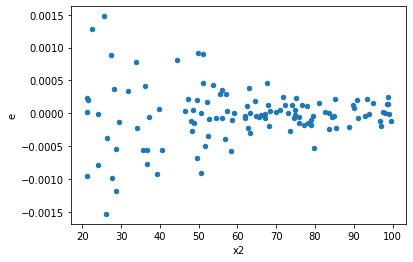

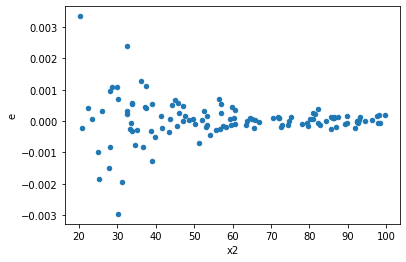

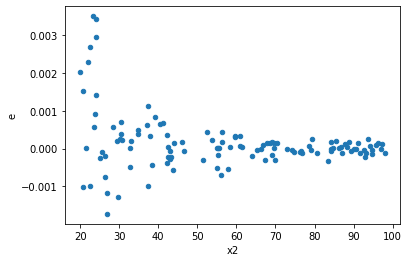

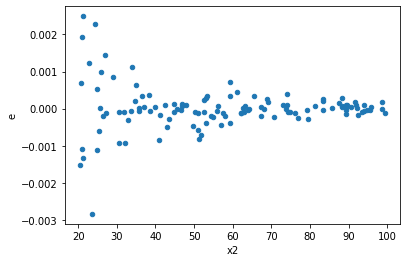

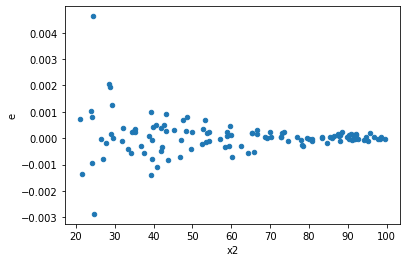

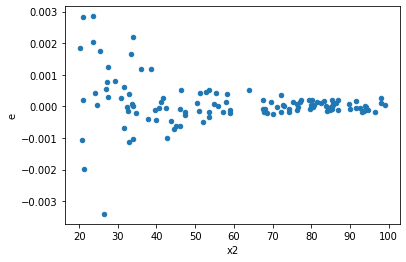

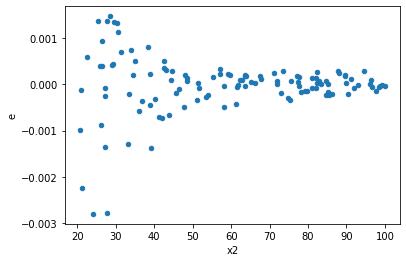

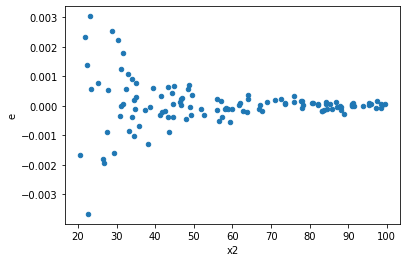

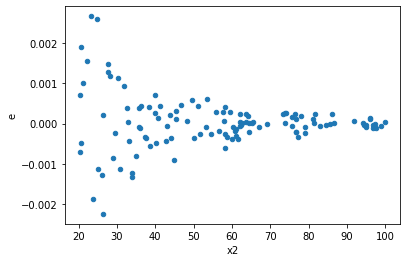

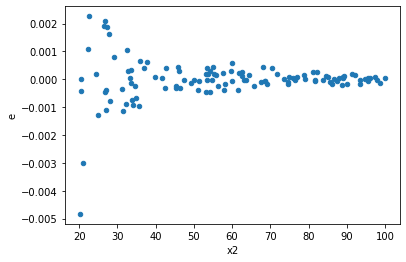

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,48.0,64.0,1.2392005393885824e-05,3.925505541113104e-05,2.58166779039288e-07,6.133602407989225e-07,2.3758294660583767,0.0012830615956143099,0.9993584692021928,0.0006415307978071549,Reject005=0 : Heteroscedasticity
5.0,63.0,49.0,2.281324192580339e-06,5.8421919233955e-05,3.621149512032284e-08,1.1922840659990816e-06,32.92556858084384,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,62.0,50.0,2.097186297311501e-06,4.4240415761279046e-05,3.3825585440508085e-08,8.848083152255809e-07,26.157960127010014,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,54.0,58.0,6.926463373043478e-06,6.167653624628858e-05,1.282678402415459e-07,1.0633885559704928e-06,8.29037546720976,1.800781745942004e-13,0.99999999999991,9.00390872971002e-14,Reject005=0 : Heteroscedasticity
8.0,55.0,57.0,7.072804337869776e-06,4.411964093189588e-05,1.285964425067232e-07,7.740287882788751e-07,6.019052885062568,2.3703106144523645e-10,0.9999999998814845,1.1851553072261822e-10,Reject005=0 : Heteroscedasticity
9.0,43.0,69.0,1.2311594835177997e-05,5.478382292127866e-05,2.8631615895762784e-07,7.939684481344733e-07,2.7730479866208784,0.00015365835857417132,0.9999231708207129,7.682917928708566e-05,Reject005=0 : Heteroscedasticity
10.0,54.0,58.0,6.18863337732037e-06,1.6463672008319723e-05,1.1460432180222907e-07,2.83856413936547e-07,2.476838652091966,0.0008326701669196801,0.9995836649165402,0.00041633508345984005,Reject005=0 : Heteroscedasticity
11.0,51.0,61.0,1.5095561016096497e-06,3.7345085245658056e-05,2.959913924724803e-08,6.122145122239025e-07,20.683524176495197,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
12.0,51.0,61.0,1.2651094614255495e-05,4.411665346821045e-05,2.480606787108921e-07,7.232238273477123e-07,2.9155117655330205,7.855514788523976e-05,0.9999607224260574,3.927757394261988e-05,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,52.0,1.3089021799187756e-05,4.898222977919847e-06,2.1815036331979594e-07,9.419659572922782e-08,0.43179664840228116,0.0018537106111526736,Reject005=0 : Heteroscedasticity
1.0,63.0,49.0,3.986907986153388e-05,6.906575687855385e-06,6.328425374846647e-07,1.4095052424194665e-07,0.22272605884265836,4.1219934616776384e-08,Reject005=0 : Heteroscedasticity
2.0,49.0,63.0,3.988434090465867e-05,1.6299344688414798e-05,8.139661409114014e-07,2.5871975695896506e-07,0.317850760560231,5.60638379484463e-05,Reject005=0 : Heteroscedasticity
3.0,65.0,47.0,4.1023027081535226e-05,1.926463061500117e-06,6.311234935620804e-07,4.098857577659823e-08,0.06494541273571904,2.847145475213413e-21,Reject005=0 : Heteroscedasticity
4.0,48.0,64.0,1.2392005393885824e-05,3.925505541113104e-05,2.58166779039288e-07,6.133602407989225e-07,2.3758294660583767,0.0012830615956143099,Reject005=0 : Heteroscedasticity
5.0,63.0,49.0,2.281324192580339e-06,5.8421919233955e-05,3.621149512032284e-08,1.1922840659990816e-06,32.92556858084384,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,62.0,50.0,2.097186297311501e-06,4.4240415761279046e-05,3.3825585440508085e-08,8.848083152255809e-07,26.157960127010014,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,54.0,58.0,6.926463373043478e-06,6.167653624628858e-05,1.282678402415459e-07,1.0633885559704928e-06,8.29037546720976,1.800781745942004e-13,Reject005=0 : Heteroscedasticity
8.0,55.0,57.0,7.072804337869776e-06,4.411964093189588e-05,1.285964425067232e-07,7.740287882788751e-07,6.019052885062568,2.3703106144523645e-10,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    716
Reject005=1 : Homoscedasticity      284
Name: Result_test, dtype: int64